# Load packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
from scipy import stats
from statistics import stdev

# Load data

In [3]:
df = pd.read_excel("D:/BA/Contest/cancer_datasets.xlsx")
df.head(10)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
5,P102,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
6,P103,52,2,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
7,P104,28,2,3,1,4,3,2,3,4,...,3,2,2,4,2,2,3,4,3,Low
8,P105,35,2,4,5,6,5,6,5,5,...,1,4,3,2,4,6,2,4,1,Medium
9,P106,46,1,2,3,4,2,4,3,3,...,1,2,4,6,5,4,2,1,5,Medium


# Check data

In [4]:
df.shape

(1000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [6]:
df.describe().round(2)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,...,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,37.17,1.40,3.84,4.56,5.16,4.84,4.58,4.38,4.49,4.46,...,4.86,3.86,3.86,4.24,3.78,3.75,3.92,3.54,3.85,2.93
std,12.01,0.49,2.03,2.62,1.98,2.11,2.13,1.85,2.14,2.12,...,2.43,2.24,2.21,2.29,2.04,2.27,2.39,1.83,2.04,1.47
min,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,27.75,1.00,2.00,2.00,4.00,3.00,2.00,3.00,2.00,3.00,...,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
50%,36.00,1.00,3.00,5.00,6.00,5.00,5.00,4.00,4.00,4.00,...,4.00,3.00,3.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00
75%,45.00,2.00,6.00,7.00,7.00,7.00,7.00,6.00,7.00,7.00,...,7.00,5.00,6.00,6.00,5.00,5.00,5.00,5.00,6.00,4.00
max,73.00,2.00,8.00,8.00,8.00,8.00,7.00,7.00,7.00,7.00,...,9.00,9.00,8.00,9.00,8.00,8.00,9.00,7.00,7.00,7.00


In [7]:
df.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

# Data Exploration

In [8]:
df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

<AxesSubplot:title={'center':'Cancer Rate \nCountplot'}, xlabel='Level', ylabel='count'>

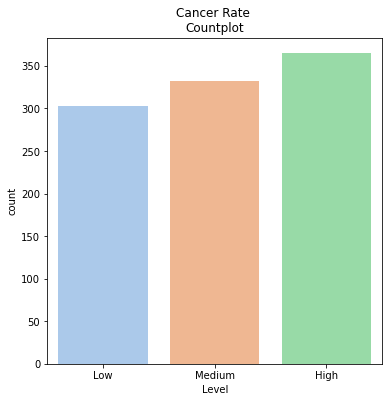

In [9]:
plt.figure(figsize=(6,6))
plt.title('Cancer Rate \nCountplot')
sns.countplot(x= 'Level', data= df, palette= 'pastel')

# EDA

Age, Gender and Cancer Level of patient

In [10]:
df[['Age', 'Gender']].describe().round(2)

,Age,Gender
count,1000.00,1000.00
mean,37.17,1.40
std,12.01,0.49
min,14.00,1.00
25%,27.75,1.00
50%,36.00,1.00
75%,45.00,2.00
max,73.00,2.00


In [11]:
def boxplot_create(x, y, z, width, color):
    plt.figure(figsize = (width, 8))
    sns.boxplot(x = x, y = y, hue = z, data = df, palette = color, showfliers = False)

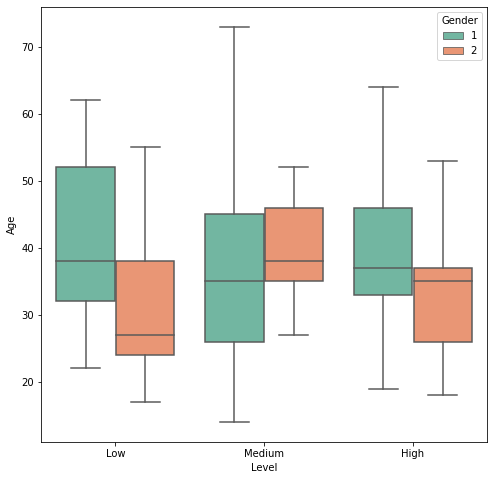

In [12]:
boxplot_create('Level', 'Age', 'Gender',  8, 'Set2')

Personal Risks (Occupational & Genetic) related to Cancer Level

<AxesSubplot:xlabel='OccuPational Hazards', ylabel='Genetic Risk'>

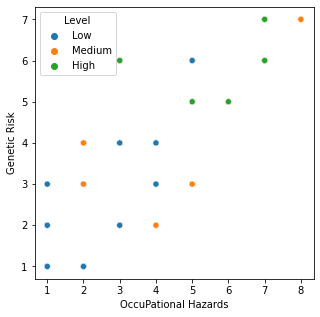

In [13]:
plt.figure(figsize = (5, 5))
sns.scatterplot(data=df, x='OccuPational Hazards', y='Genetic Risk', hue='Level' ,palette='tab10')

Background Diseases of patients and their impact on Cancer Level

In [14]:
background_diseases = df[['chronic Lung Disease', 'Obesity', 'Swallowing Difficulty', 'Level']]

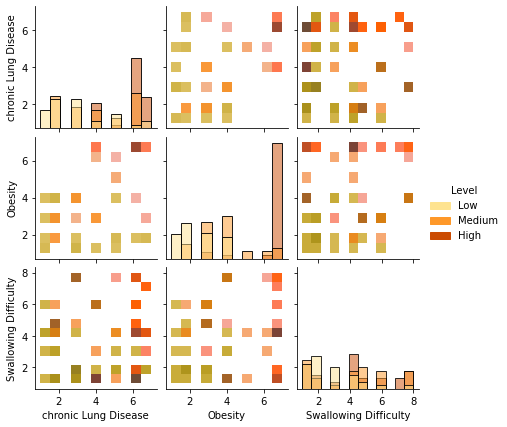

In [15]:
sns.pairplot(data = background_diseases, hue = 'Level',palette= 'YlOrBr', kind= 'hist', height= 2)

Overview of Impact of Internal Factor(Smoking) and External Factor(Passive Smoker)

<AxesSubplot:title={'center':'Internal Factor(Smoking) impact'}, xlabel='Level', ylabel='count'>

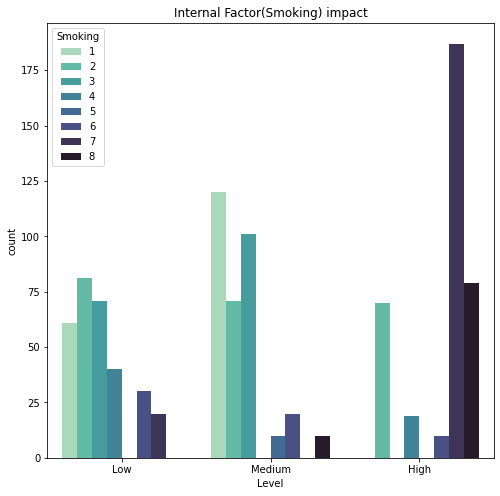

In [16]:
plt.figure(figsize= (8,8))
plt.title('Internal Factor(Smoking) impact')
sns.countplot(data=df, x='Level', hue= 'Smoking', palette= 'mako_r')

<AxesSubplot:title={'center':'External Factor(Passive Smoker) impact'}, xlabel='Level', ylabel='count'>

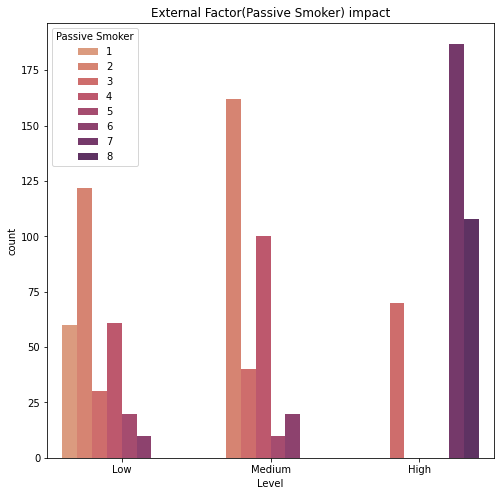

In [17]:
plt.figure(figsize= (8,8))
plt.title('External Factor(Passive Smoker) impact')
sns.countplot(data=df, x='Level', hue= 'Passive Smoker', palette= 'flare')

# Features correlation

In [18]:
habits = df[['Alcohol use', 'Balanced Diet', 'Smoking', 'Snoring']]
corr1 = habits.corr()

<AxesSubplot:title={'center':'Impact of Routine Habits on Cancer Level \nCorrelation Plot'}>

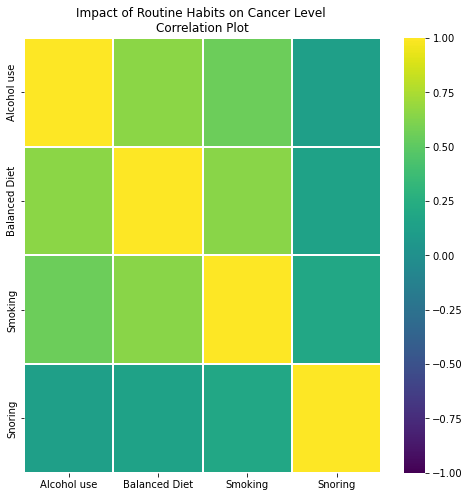

In [19]:
plt.figure(figsize= (8,8))
plt.title('Impact of Routine Habits on Cancer Level \nCorrelation Plot')
sns.heatmap(corr1, xticklabels = corr1.columns, yticklabels = corr1.columns, 
            cmap= 'viridis', linewidths=.1, vmax = 1, vmin = -1)

In [20]:
r_issues = df[['Chest Pain', 'Shortness of Breath', 'Wheezing', 'Coughing of Blood',]]
corr2 = r_issues.corr()

<AxesSubplot:title={'center':'Relation of Respiratory issues on Cancer Level \nCorrelation Plot'}>

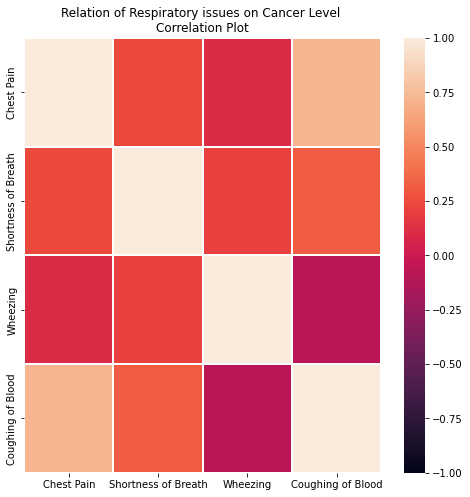

In [21]:
plt.figure(figsize= (8,8))
plt.title('Relation of Respiratory issues on Cancer Level \nCorrelation Plot')
sns.heatmap(corr2, xticklabels = corr2.columns, yticklabels = corr2.columns, 
            cmap= 'rocket', linewidths=.1, vmax = 1, vmin = -1)

In [22]:
symptoms = df[[ 'Fatigue', 'Weight Loss', 'Frequent Cold', 'Clubbing of Finger Nails']]
corr3 = symptoms.corr()

<AxesSubplot:title={'center':'Symptoms based on Cancer Level \nCorrelation Plot'}>

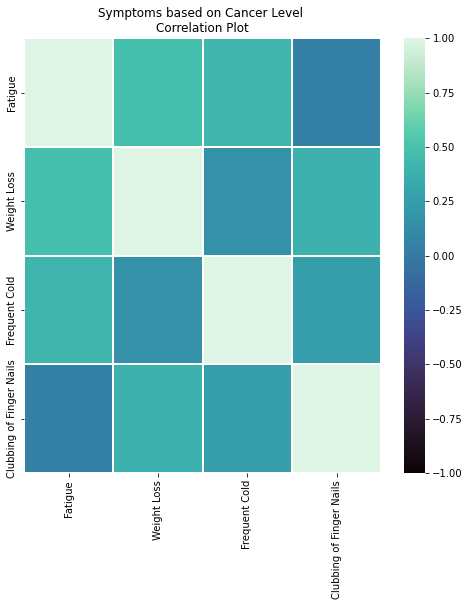

In [23]:
plt.figure(figsize= (8,8))
plt.title('Symptoms based on Cancer Level \nCorrelation Plot')
sns.heatmap(corr3, xticklabels = corr3.columns, yticklabels = corr3.columns, 
            cmap= 'mako', linewidths=.1, vmax = 1, vmin = -1)

# Feature Selection

Though there are a lot of variables to look at we can we can just find the most important ones by using the SelectKBest Algorithm with ANOVA F-ratio statistic. This method will generate the F-ratio scores of all features and we can determine which ones to use for machine learning.

In [24]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif 

In [25]:
X=df.drop(['Level','Patient Id'], axis=1)
Y=df['Level']
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [26]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 

<AxesSubplot:xlabel='Score', ylabel='Feature'>

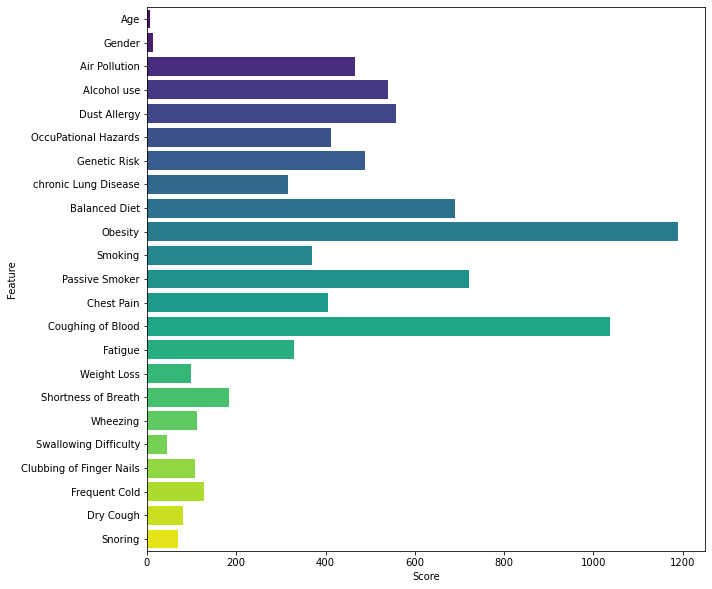

In [27]:
plt.figure(figsize = (10, 10))
sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')


In [28]:
selection=featureScores[featureScores['Score']>=200]
selection=list(selection['Feature'])
selection.append('Level')
cancer=df[selection]
cancer.head(10)

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Level
0,2,4,5,4,3,2,2,4,3,2,2,4,3,Low
1,3,1,5,3,4,2,2,2,2,4,2,3,1,Medium
2,4,5,6,5,5,4,6,7,2,3,4,8,8,High
3,7,7,7,7,6,7,7,7,7,7,7,8,4,High
4,6,8,7,7,7,6,7,7,8,7,7,9,3,High
5,4,5,6,5,5,4,6,7,2,3,4,8,8,High
6,2,4,5,4,3,2,2,4,3,2,2,4,3,Low
7,3,1,4,3,2,3,4,3,1,4,3,1,3,Low
8,4,5,6,5,6,5,5,5,6,6,6,5,1,Medium
9,2,3,4,2,4,3,3,3,2,3,4,4,1,Medium


# Preprocessing data

In [29]:
y_data = cancer['Level'].replace({'Low', 'Medium', 'High'}, {0, 1, 2})
x_data = cancer.drop('Level', axis=1)

In [30]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size = 0.35,
                                                    random_state=0, 
                                                    shuffle=True)

In [33]:
x_test = scaler.fit_transform(x_test)
x_train = scaler.fit_transform(x_train)

In [34]:
print("X_train shape :",x_train.shape)
print("Y_train shape :",y_train.shape)
print("X_test shape :",x_test.shape)
print("Y_test shape :",y_test.shape)

X_train shape : (650, 13)
Y_train shape : (650,)
X_test shape : (350, 13)
Y_test shape : (350,)


# Machine Learning Model

The size of the input data is relatively small, so at first, we would like to perform 2 simple machine learning models, which is Decision Tree Classifier and Random Forest Classifier. Decision trees are implemented when it involves a mixture of feature data types and easy interpretation. The random forest algorithm model handles multiple trees so that the performance is not affected. 

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

* Decision Tree Classifier

In [36]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_dt = dt.predict(x_test)

In [37]:
score_dt = accuracy_score(y_test, y_dt)
score_dt

1.0

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Y_predict', ylabel='Y_test'>

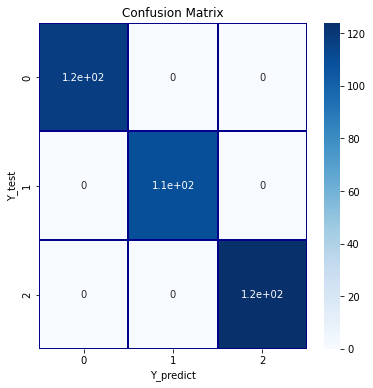

In [38]:
cfm_dt = pd.crosstab(y_test, y_dt, rownames=['Y_test'], colnames= ['Y_predict'])
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(cfm_dt, annot= True, linewidths=.2, linecolor= 'Darkblue', cmap= 'Blues')

In [39]:
print(classification_report(y_test, y_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       124

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350



* Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_rf = rf.predict(x_test)

In [41]:
score_rf = accuracy_score(y_test, y_rf)
score_rf

1.0

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Y_predict', ylabel='Y_test'>

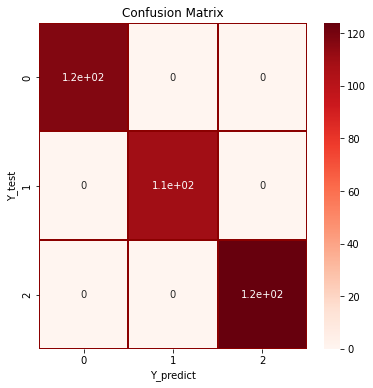

In [42]:
cfm_rf = pd.crosstab(y_test, y_rf, rownames=['Y_test'], colnames= ['Y_predict'])
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(cfm_rf, annot= True, linewidths=.2, linecolor= 'Darkred', cmap= 'Reds')

In [43]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       124

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350



As we can see, the accuracy indexs of 2 models above is absolutely too high, which mean these simple models are overfitting or the data is not big enough. To reach the best results of the research without getting overfitted, we will continue building 2 advanced models. Moreover, to avoid the same problems above, we will search for the most appropriate function and parameters, then we will take a cross-validation.   

# Advanced Machine Learning Model

We will use the support vector machines classifiers (SVC). The SVC's can handle higher dimensional data and genearte hyperplanes for separation. We can evalute multiple parameters at one using Grid or Randomization Search functions. Grid Search evalutes several input parameters at all combinations input while randomized search looks for the best.

In [44]:
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV 
import itertools 

* Grid Search

In [45]:
svm_grid= {
    "C": [.01, .1, 1, 5, 10, 100], 
    "gamma": [0, .01, .1, 1, 5, 10, 100],
    "kernel": ['linear', 'poly', 'rbf'],
    "random_state": [1]}

In [46]:
gs = GridSearchCV(
    estimator=SVC(), 
    param_grid=svm_grid, 
    scoring=None,
    n_jobs=-1, 
    cv=10, 
    verbose=0,
    return_train_score=True
    )

In [47]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 100],
                         'gamma': [0, 0.01, 0.1, 1, 5, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'random_state': [1]},
             return_train_score=True)

In [48]:
y_gs = gs.predict(x_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Y_predict', ylabel='Y_test'>

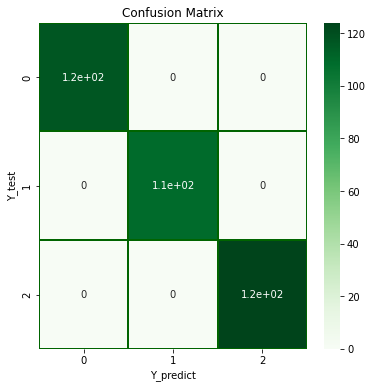

In [49]:
cfm_gs = pd.crosstab(y_test, y_gs, rownames=['Y_test'], colnames= ['Y_predict'])
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(cfm_gs, annot= True, linewidths=.2, linecolor= 'Darkgreen', cmap= 'Greens')

In [50]:
print("**Grid search results of SVC Grid Search**")
print("The best parameters are:",gs.best_params_)
print("Best training accuracy:\t", gs.best_score_)
print('Classification Report:')
print(classification_report(y_test, y_gs))

**Grid search results of SVC Grid Search**
The best parameters are: {'C': 0.01, 'gamma': 1, 'kernel': 'poly', 'random_state': 1}
Best training accuracy:	 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       124

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350



* Randomized Search

In [51]:
svm_rds = {
    "C": np.arange(0.01,2, 0.01),   
    "gamma": np.arange(0,1, 0.01),
    "kernel": ["rbf","linear","poly"],
    "random_state": [1]}

In [52]:
rds = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=svm_rds,
    n_iter=10,
    n_jobs=-1,
    cv=10,
    verbose=0,
    random_state=1,
    return_train_score=True
)

In [53]:
rds.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0....
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                                        'kernel': ['rbf', 'linear', 'poly'],
                                        'random_state': [1]},
                 

In [54]:
y_rds = rds.predict(x_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Y_predict', ylabel='Y_test'>

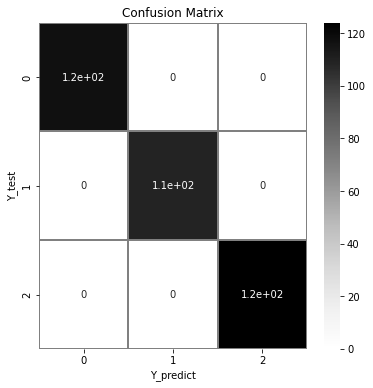

In [55]:
cfm_rds = pd.crosstab(y_test, y_rds, rownames=['Y_test'], colnames= ['Y_predict'])
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(cfm_rds, annot= True, linewidths=.2, linecolor= 'Grey', cmap= 'Greys')

In [56]:
print("**Grid search results of SVC Randomized Search**")
print("The best parameters are:",rds.best_params_)
print("Best training accuracy:\t", rds.best_score_)
print('Classification Report:')
print(classification_report(y_test, y_rds))

**Grid search results of SVC Randomized Search**
The best parameters are: {'random_state': 1, 'kernel': 'poly', 'gamma': 0.3, 'C': 0.18000000000000002}
Best training accuracy:	 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       124

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350



# Conclusion

We investigated the data, checking for data correlationship, visualizing the features and understanding the relationship between different features. Through EDA and Modelling of the Data, we observed that:

* Many features have some prominent separation alone for distincting the level of cancer.
* Using KBestSelection we were able to use the most important features that have the most effect on the Result(Cancer Level) from the dataset.
* The 2 simple machine learning models all result to highest level of accuracy because of the small size of data in general and train data in particular.
* The 13 selected features provided 100% accuracy when modeled with either Grid/Randomized Searches on support vector machine classifier.